# Analysis Goal

The goal of this analysis is to analyze Nordic Choice meeting booking data and find the answers for the following questions:
 - Why some venues succeed and the others dont regarding traffic, bookings, conversion, answer time etc

 

# Summary Result

Having explored the data available, we detected a area specific malfunction in the search of the nordicchoicehotel.com, which blocks the visitors from searching those areas for their meeting destination. The areas are Arlanda, Sweden and Copenhagen, Denmark. 

# Context Backstory

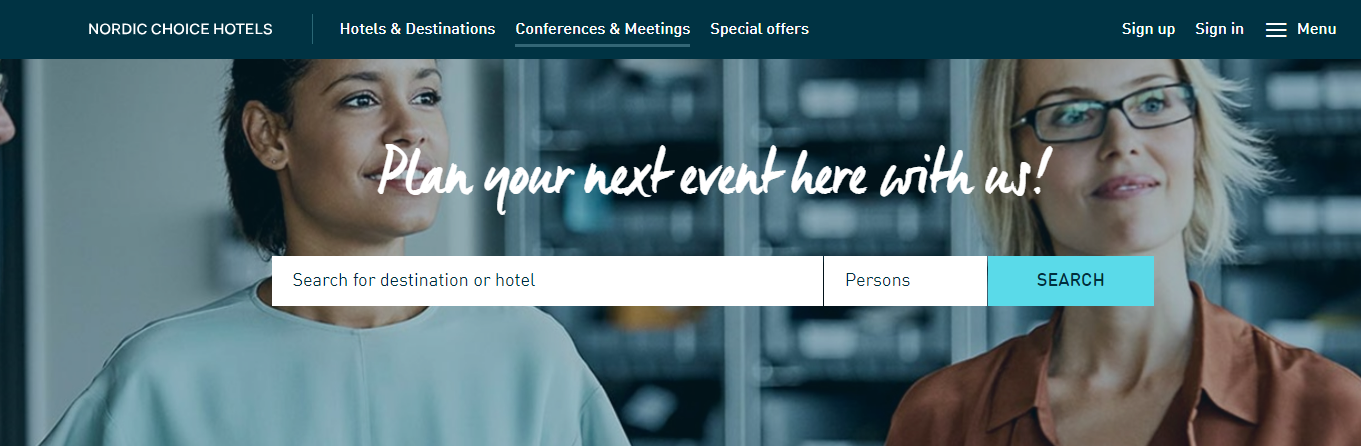

In [259]:
Image(filename="search_bar.png")

                         Arlanda can't be found in nordicchoicehotel.com only Arlandastad

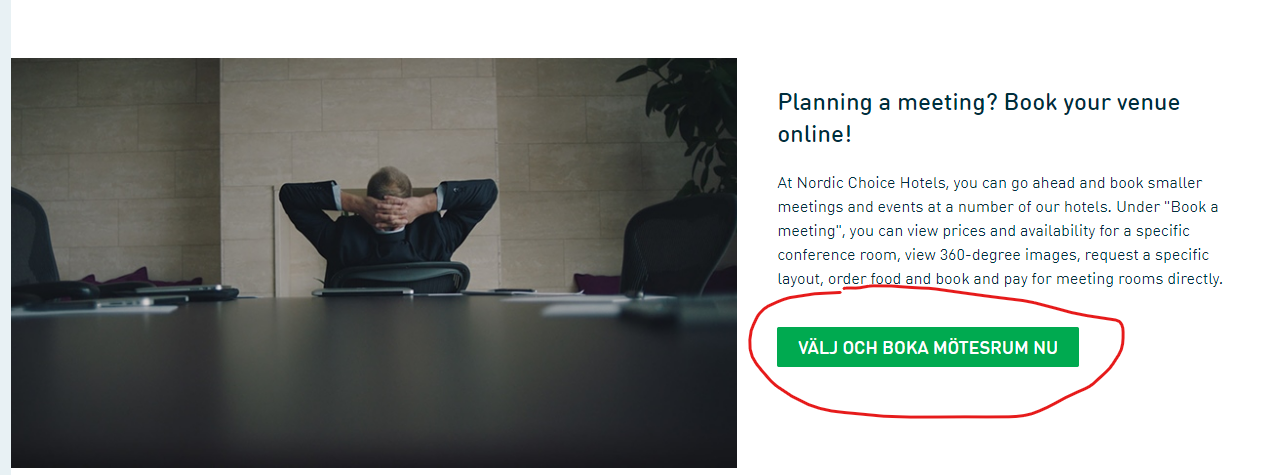

In [261]:
Image(filename="button.png")

**The button leading to bookameeting.se in English page is in Swedish, what if the booker is a foreigner trying to book a meeting --> he can't figure out the purpose of that button** 

# Data Understanding

Let's start from comparing the venues with high traffic and low traffic and then venues with high conversion and low conversion. Fortunately, we have the necessary data for both targets. 

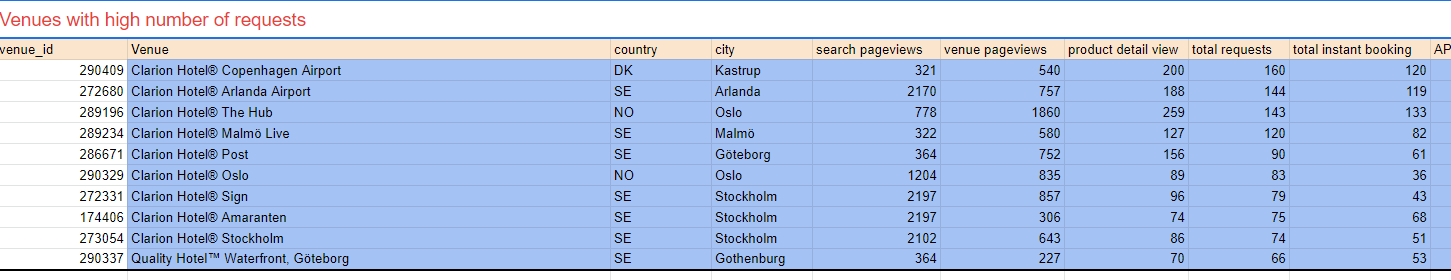

In [247]:
from IPython.display import Image
Image(filename="high_venues.png")

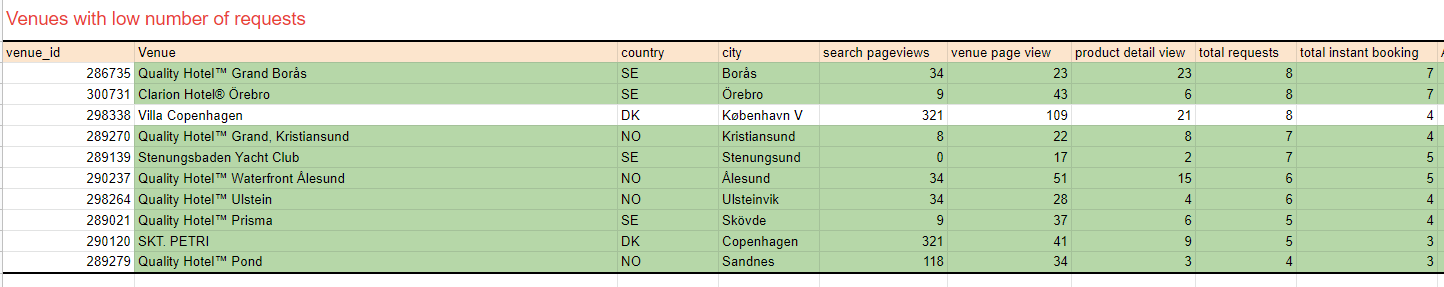

In [249]:
Image(filename="low_venues.png")

In [103]:
import plotly.express as px
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
import pycountry
from shapely.geometry import Point, Polygon

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd

df = pd.read_csv('nch_cancel.csv', low_memory=False)
df_summary = pd.read_csv('nch_summary.csv')
df_geo = pd.read_csv('nch_room_info.csv')

In [231]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [229]:
import plotly.offline as py 
py.init_notebook_mode(connected=True)

# Data Cleaning

In [130]:
#lower column names
df.columns = [x.lower() for x in df.columns]
#add underscore between column names
df.columns = [i.replace(' ','_') for i in df.columns]
df_summary.columns = [x.lower() for x in df_summary.columns]
df_summary.columns = [i.replace(' ','_') for i in df_summary.columns]

In [132]:
#change booking status
df.loc[df.status == 'booking_status_2', 'status'] = 'canceled'
df.loc[df.status == 'booking_status_1', 'status'] = 'canceled'

In [133]:
style_1 =  "{:.2%}".format
df_summary[['%price_booking','%enquiry', '%instant_booking']]= df_summary[['%price_booking','%enquiry', '%instant_booking']].applymap(style_1)

# Venue based statistics

In [136]:
df_o_thres = df_summary[df_summary['past_confirmed_value']> 3000]
df_u_thres = df_summary[df_summary['past_confirmed_value']< 3000]

# *Booking type division and average booking value by booking types*

**Venues Under Threshold**

In [263]:
#venues under threshold
df_u_thres[['venue_name', 'country', 'city', '%price_booking', '%enquiry', '%instant_booking']].sort_values('%price_booking', ascending = False).set_index('venue_name').reset_index()

,venue_name,country,city,%price_booking,%enquiry,%instant_booking
0,Quality Airport Hotel™ Stavanger,Norway,Sola,7.69%,38.46%,53.85%
1,Quality Hotel™ Sarpsborg,Norway,Sarpsborg,7.14%,21.43%,71.43%
2,Quality Hotel™ Arlanda XPO,Sweden,Arlandastad,64.29%,7.14%,28.57%
3,Clarion Hotel® Bergen,Norway,Bergen,50.00%,6.25%,43.75%
4,"Quality Hotel™ Grand, Kristiansund",Norway,Kristiansund,50.00%,0.00%,50.00%
5,Comfort Hotel® Runway,Norway,Gardermoen,45.45%,0.00%,54.55%
6,Clarion Grand Hotel® Helsingborg,Sweden,Helsingborg,43.75%,12.50%,43.75%
7,Quality Hotel™ Ulstein,Norway,Ulsteinvik,33.33%,0.00%,66.67%
8,Clarion Hotel® Ernst,Norway,Kristiansand,26.32%,5.26%,68.42%
9,Villa Copenhagen,Denmark,København V,25.00%,25.00%,50.00%


In [254]:
df_u_thres[['venue_name', 'country', 'city', 'mean_price_booking_value', 'mean_enquiry_value', 'mean_instant_booking']].set_index('venue_name').reset_index()

,venue_name,country,city,mean_price_booking_value,mean_enquiry_value,mean_instant_booking
0,Hotel C Stockholm,Sweden,Stockholm,0.00,1029.16,15.26
1,Quality Hotel™ Panorama Göteborg,Sweden,Göteborg,0.00,116.50,133.27
2,Clarion Hotel® Bergen,Norway,Bergen,506.78,1059.18,929.08
3,Quality Hotel™ Ålesund,Norway,Ålesund,1804.15,0.00,266.10
4,Quality Hotel™ Arlanda XPO,Sweden,Arlandastad,427.73,231.14,34.44
5,Clarion Hotel® Ernst,Norway,Kristiansand,352.22,276.20,316.11
6,Quality Airport Hotel™ Stavanger,Norway,Sola,304.07,5959.79,390.73
7,Clarion Grand Hotel® Helsingborg,Sweden,Helsingborg,583.69,729.61,100.56
8,Quality Hotel™ Skjærgården,Norway,Langesund,0.00,0.00,331.66
9,Quality Hotel™ Sarpsborg,Norway,Sarpsborg,2815.70,2687.99,563.54


There are 23 under threshold venues. Low traffic and booking requests are the reason why the venues did not reach the threshold

# *Booking type division and average booking value by booking types*

**Venues Reached Threshold**

In [253]:
#venues reached threshold
df_o_thres[['venue_name', 'country', 'city', '%price_booking', '%enquiry', '%instant_booking']].sort_values('%price_booking', ascending = False).set_index('venue_name').reset_index()

,venue_name,country,city,%price_booking,%enquiry,%instant_booking
0,Quality Hotel™ Leangkollen,Norway,Asker,93.10%,6.90%,0.00%
1,Clarion Hotel® Amaranten,Sweden,Stockholm,9.46%,0.00%,90.54%
2,Clarion Hotel® Sundsvall,Sweden,Sundsvall,9.09%,0.00%,90.91%
3,Clarion Hotel® Air,Norway,Sola,8.33%,8.33%,83.33%
4,Quality Hotel™ The Weaver,Sweden,Mölndal,56.25%,9.38%,34.38%
5,THE THIEF,Norway,Oslo,55.00%,5.00%,40.00%
6,Clarion Hotel® The Hub,Norway,Oslo,5.63%,1.41%,92.96%
7,Quality Airport Hotel™ Værnes,Norway,Stjørdal,47.83%,21.74%,30.43%
8,Clarion Hotel® Oslo,Norway,Oslo,40.74%,17.28%,41.98%
9,Quality Hotel™ The Mill,Sweden,Malmö,40.00%,13.33%,46.67%


In [262]:
df_o_thres[['venue_name', 'country', 'city', 'mean_price_booking_value', 'mean_enquiry_value', 'mean_instant_booking']].set_index('venue_name').reset_index()

,venue_name,country,city,mean_price_booking_value,mean_enquiry_value,mean_instant_booking
0,Clarion Hotel® Arlanda Airport,Sweden,Arlanda,360.70,1592.30,452.47
1,Quality Hotel™ Globe,Sweden,Stockholm,871.33,1317.27,1162.73
2,Clarion Hotel® Stockholm,Sweden,Stockholm,1412.52,401.58,881.87
3,Nordic Light Hotel,Sweden,Stockholm,1789.59,518.31,651.06
4,Clarion Hotel® Sign,Sweden,Stockholm,2263.31,1006.37,592.10
5,Quality Hotel™ Friends,Sweden,Solna,1568.30,2868.47,819.14
6,Quality Hotel™ 33,Norway,Oslo,598.01,2622.61,408.40
7,Clarion Hotel® The Hub,Norway,Oslo,1378.71,1406.84,779.88
8,Clarion Hotel® Copenhagen Airport,Denmark,Kastrup,443.70,605.04,673.16
9,Clarion Hotel® The Edge,Norway,Tromsø,1811.76,0.00,481.14


# Date venues reached threshold

In [151]:
#format date threshold
df_o_thres.loc[:,'date_threshold']= pd.to_datetime(df_o_thres.loc[:, 'date_threshold'], format='%d/%m/%Y')
df_o_thres=df_o_thres.sort_values(['date_threshold'])

In [152]:
#set layout for the graph
layout = dict(plot_bgcolor='#FFFAF0',
              margin=dict(t=20, l=20, r=20, b=20),
              xaxis=dict(title='Date Threshold',
                         linecolor='#d9d9d9',
                         showgrid=False,
                         mirror=True),
              yaxis=dict(title='Past Confirmed Value',
                         range=[0, 100000],
                         linecolor='#d9d9d9',
                         showgrid=False,
                         mirror=True))
"set "
data = go.Scatter(x=df_o_thres['date_threshold'],
                  y=df_o_thres['past_confirmed_value'],
                  text=df_o_thres['venue_name'],
                  textposition='top right',
                  textfont=dict(color='#E58606'),
                  marker=dict(color='#5D69B1', size=4),
                  line=dict(color='#1f77b4', width=2, dash='dash'))
fig = go.Figure(data=data, layout=layout)

fig.show()

# Data Exploration

# Country Based Statistics

In [255]:
list_countries = df_summary['country'].unique().tolist()
d_country_code = {}  # To hold the country names and their ISO
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        # country_data is a list of objects of class pycountry.db.Country
        # The first item  ie at index 0 of list is best fit
        # object of class Country have an alpha_3 attribute
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        # If could not find country, make ISO code ' '
        d_country_code.update({Sweden: 'SWE', Finland: 'FIN', Norway:'NOR', Denmark: 'DNK'})


In [256]:
for k, v in d_country_code.items():
    df_summary.loc[(df_summary.country == k), 'iso_alpha'] = v

In [257]:
df_requests = df_summary['total_requests'].groupby([df_summary['country'], df_summary['iso_alpha']]).sum()
df_requests = pd.DataFrame(df_requests)
df_requests = df_requests.reset_index()


In [258]:
fig = px.choropleth(data_frame = df_requests,
                    locations= "iso_alpha",
                    color= "total_requests",  # value in column 'Confirmed' determines color
                    hover_name= "country",
                    color_continuous_scale="dense")  
fig.add_scattergeo(
    locations=df_requests['country'],
    text=df_requests['country'],
    mode='text')
fig.update_layout(
    title={'text':'Number of requests per country',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
fig.show()

# City Based Statistics

In [14]:
df_sum_city = df_summary['total_requests'].groupby(df_summary['city']).sum()
df_sum_city = pd.DataFrame(df_sum_city)
df_sum_city = df_sum_city.reset_index()
df_sum_city = df_sum_city.sort_values('total_requests', ascending=False)

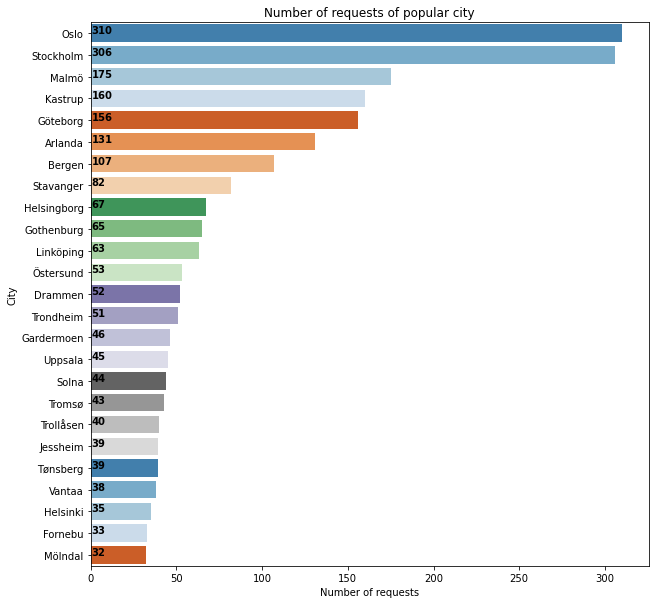

In [15]:
popular_venues = df_sum_city[df_sum_city['total_requests'] > 30]
plt.figure(figsize=(10,10))
ax = sns.barplot(x="total_requests", y="city",
                 data=popular_venues, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(popular_venues["total_requests"]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =10)
plt.title("Number of requests of popular city")
ax.set_xlabel(xlabel = 'Number of requests', fontsize = 10)
ax.set_ylabel(ylabel = 'City', fontsize = 10)
plt.show()


In [156]:
#city and its past confirmed values
past_con = df_summary['past_confirmed_value'].groupby(df_summary['city']).sum()
past_con = pd.DataFrame(past_con)
past_con = past_con.reset_index()
past_con = past_con.sort_values('past_confirmed_value', ascending=False)

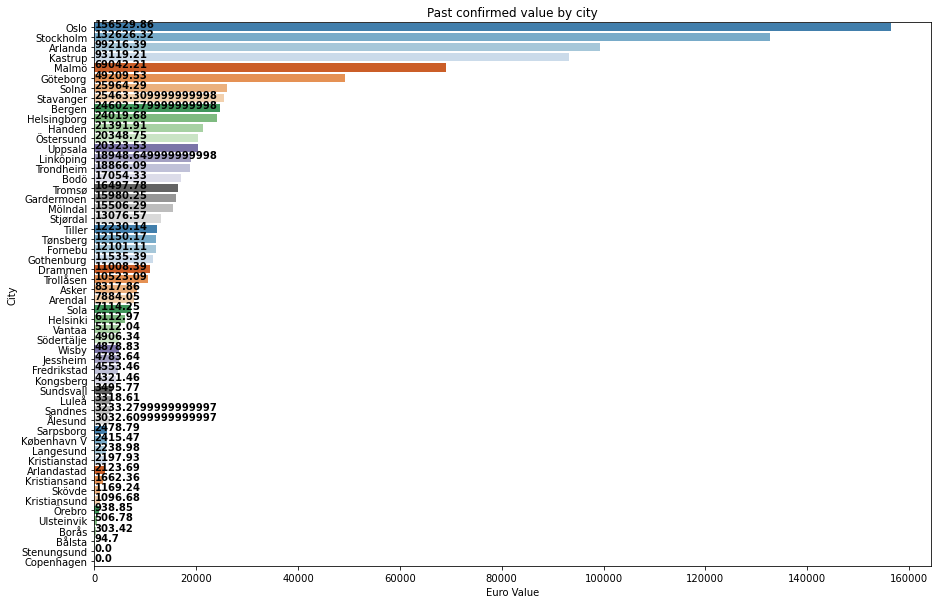

In [173]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="past_confirmed_value", y="city",
                 data=past_con, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(past_con["past_confirmed_value"]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =10)
plt.title("Past confirmed value by city")
ax.set_xlabel(xlabel = 'Euro Value', fontsize = 10)
ax.set_ylabel(ylabel = 'City', fontsize = 10)
plt.show()

As we can see from the graph above, big cities have generated the largest amount of confirmed value

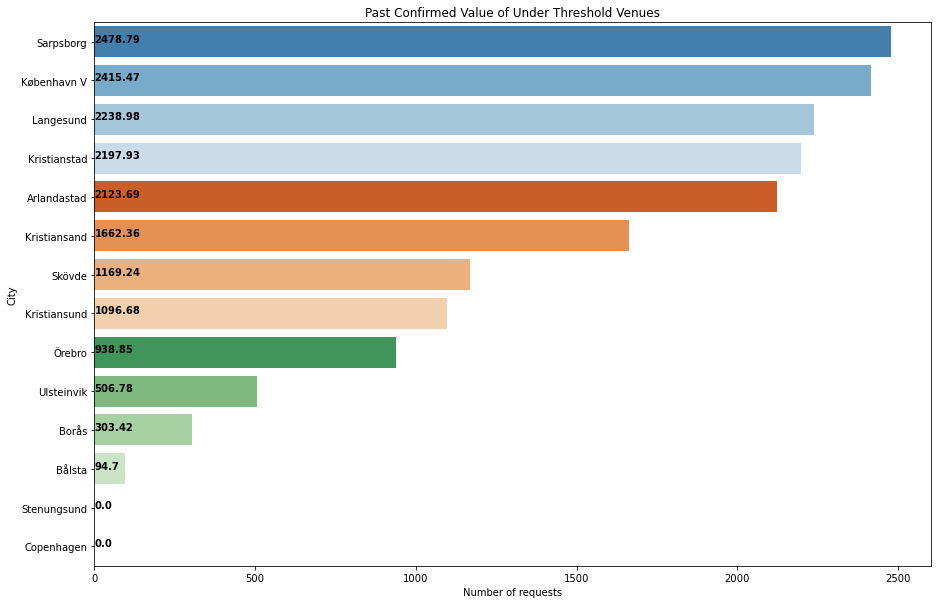

In [158]:
#as we can see from the graph above, big cities have generated the largest amount of confirmed value
un_thres = past_con[past_con['past_confirmed_value'] < 3000]
un_thres = un_thres.sort_values('past_confirmed_value', ascending=False)
plt.figure(figsize=(15,10))
ax = sns.barplot(x="past_confirmed_value", y="city",
                 data=un_thres, palette="tab20c",
                 linewidth = 1)
for i,j in enumerate(un_thres["past_confirmed_value"]):
    ax.text(.5, i, j, weight="bold", color = 'black', fontsize =10)
plt.title("Past Confirmed Value of Under Threshold Venues")
ax.set_xlabel(xlabel = 'Number of requests', fontsize = 10)
ax.set_ylabel(ylabel = 'City', fontsize = 10)
plt.show()

Some of the locations that cannot be found on the search won't receive good amount of traffic leading to low number of booking requests, and therefore won't reach the threshold.

In [264]:
#make a list of city with under threshold venues
city_list = un_thres['city'].to_list()
un_thres_cancel = cancelled[cancelled['field_address_locality'].isin(city_list)]

In [310]:
city_df =pd.DataFrame(city_list)
city_df=city_df.rename({0:'city'}, axis=1)
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="so_test_YoDa")

def getLatLong(city):
    location = geolocator.geocode(city)

    return location.latitude, location.longitude

city_df[["lat", "lon"]] = city_df.city.apply(getLatLong).apply(pd.Series)


In [322]:
city_df=city_df.merge(un_thres, right_on='city', left_on='city', how='left')


In [314]:
geometry = [Point(xy) for xy in zip(city_df['lon'], city_df['lat'])]
geometry[:3]

In [321]:
crs = {'init':'epsg:4326'}
geo_df1 = gpd.GeoDataFrame(city_df, crs=crs, geometry=geometry)


C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



In [317]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world1= world[world['name']=='Sweden']
world2= world[world['name']=='Finland']
world3= world[world['name']=='Denmark']
world4= world[world['name']=='Norway']

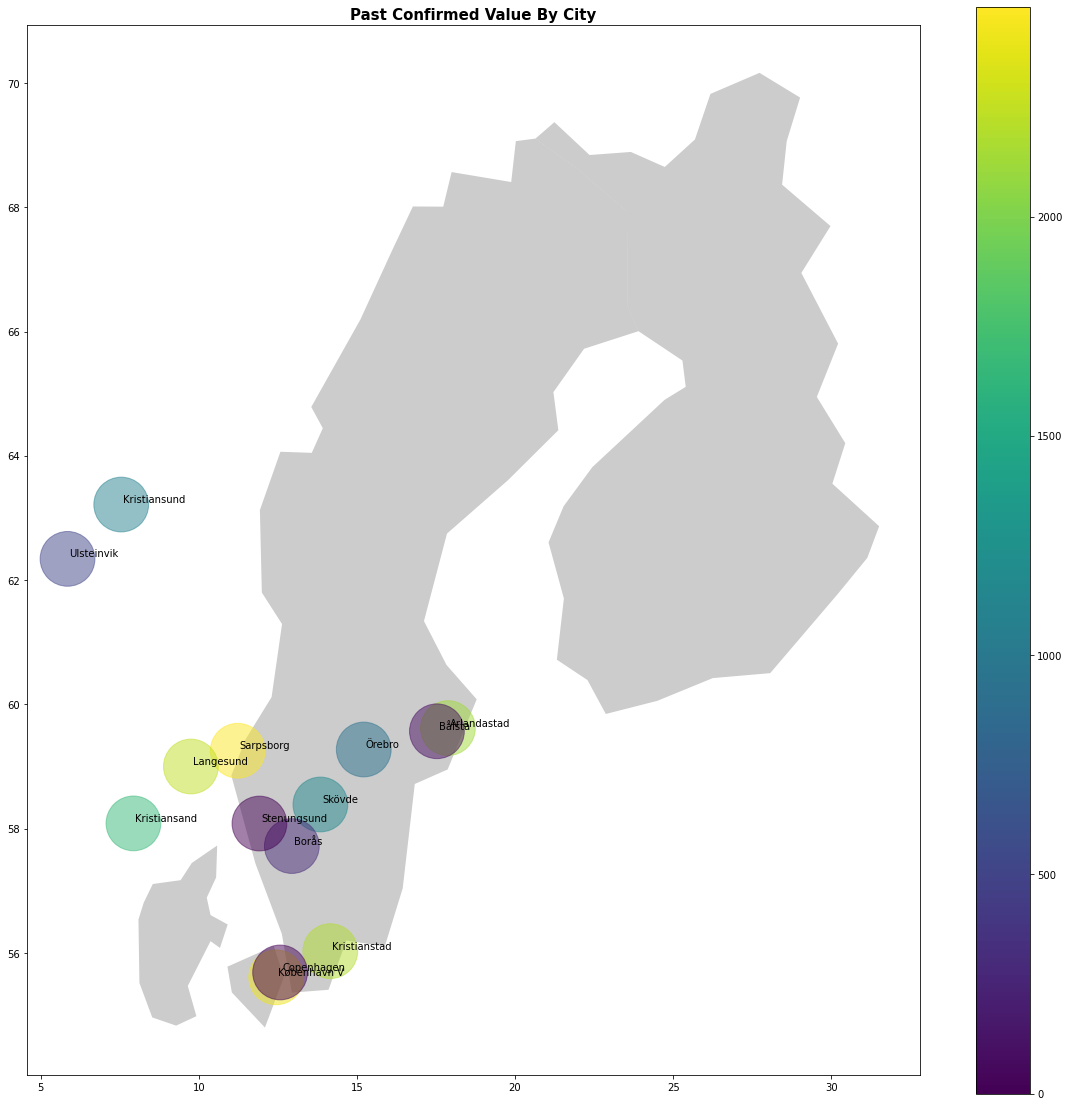

In [327]:
fig, ax = plt.subplots(figsize=(20,20))
# add .shp mapfile to axes
world2.plot(ax=ax, alpha=0.4,color='grey')
world3.plot(ax=ax, alpha=0.4,color='grey')
world1.plot(ax=ax, alpha=0.4,color='grey')


# add geodataframe to axes
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df1.plot(column='past_confirmed_value',ax=ax,alpha=0.5, legend=True,markersize=3000, antialiased=True)
# add title to graph
plt.title('Past Confirmed Value By City', fontsize=15,fontweight='bold')
# set city name
for x, y, label in zip(geo_df1['geometry'].x, geo_df1['geometry'].y, geo_df1['city']):ax.annotate(label, xy=(x,y), xytext=(2,2), textcoords='offset points')
# show map
plt.show()

# Reason for cancelling booking requests of under threshold venues

In [162]:
#create a function to get the number of cancels by month and their total as we will use the formula throughout the analysis, 
#function is a good way to avoid repeating the formula
def cancelling_insight(df):
    a = df['order_id'].groupby(df['month_cancel']).count()
    b = df['event_price_euro'].groupby(df['month_cancel']).sum()
    df1=pd.DataFrame(a)
    df2=pd.DataFrame(b)
    df1['total_price'] = df2
    df1 = df1.reset_index()
    df1 = df1.set_index('month_cancel')
    df1 = df1.reset_index()
    df1.rename(columns={'order_id':'cancelled_requests'}, inplace=True)
    return df1

In [163]:
#filter out cancel events
cancelled=df[df['status']=='canceled']
#filter out confirm events
confirmed=df[df['status']=='booking_status_3']

In [165]:
cancel_thres = cancelling_insight(un_thres_cancel)
cancel_thres = cancel_thres.set_index('month_cancel')
print(cancel_thres)
print('************************************************************')
print('Reason for cancelling')
print(un_thres_cancel['description'].value_counts())

              cancelled_requests  total_price
month_cancel                                 
0                             25     19281.83
1                              3      1250.17
2                              2      5356.93
3                              2       340.53
4                              3       775.16
8                              4      1371.34
9                              2      3246.52
10                            20      9728.69
11                             7       774.41
12                             1       653.14
************************************************************
Reason for cancelling
0                                                     49
Other                                                 10
Our event has been cancelled internally.               2
No availability.                                       2
The reply from the venue was slow.                     1
We chose another Nordic Choice Hotel.                  1
The terms of payment do

# Supplier Answer Time of under threshold venues

Text(0.5, 1.0, 'normalized supplier answer time for cancelled bookings')

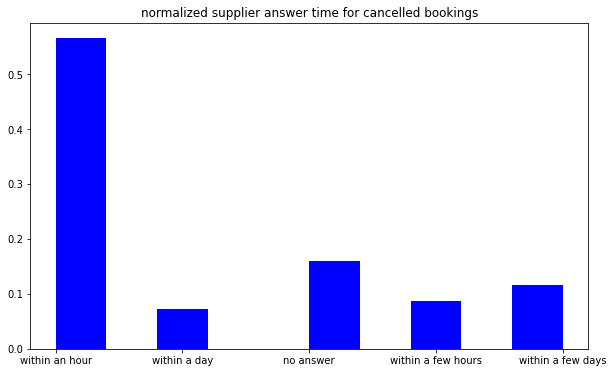

In [166]:
weights1=np.ones_like(un_thres_cancel ['supplier_answer_time'])/float(len(un_thres_cancel ['supplier_answer_time']))
fig, ax = plt.subplots(figsize=(10,6)) 
plt.hist(un_thres_cancel['supplier_answer_time'], weights=weights1, color='blue')
plt.title('normalized supplier answer time for cancelled bookings')

# Cancellation Analysis for all the bookings from 01/10/2020 - 31/10/2022

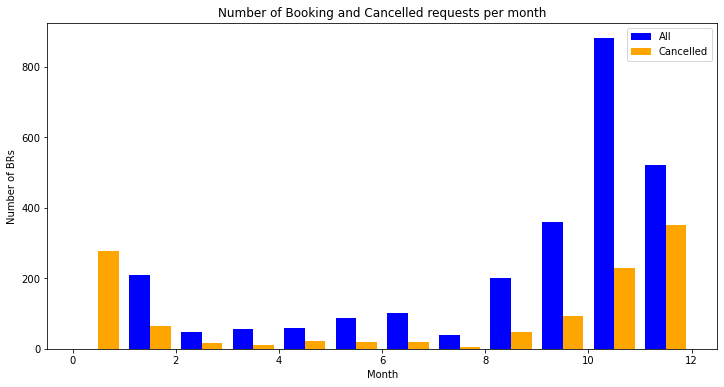

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize = (12,6))
color = ['blue', 'orange']
plt.hist([df['month_created'], cancelled['month_cancel']], bins=12, label=['All', 'Cancelled'], color=color)
ax.set_title('Number of Booking and Cancelled requests per month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of BRs')
plt.legend()

<AxesSubplot:>

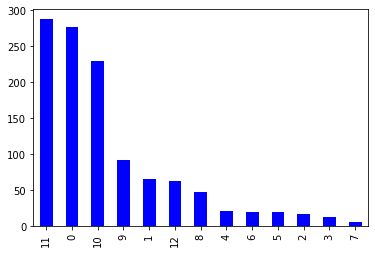

In [169]:
cancelled['month_cancel'].value_counts().plot(kind='bar', color='blue')

In [172]:
#drop Wisby and Arlandastad as they have null value for coordinates
values = ['Wisby', 'Arlandastad']
cancelled = cancelled[cancelled.field_address_locality.isin(values) == False]
cancelled

,order_id,title,nid,date_add_to_cart,date_checkout1,date_checkout2,date_purchase,date_cancel,month_created,year_cancel,...,description,field_user_company_name_value,order_type,status,event_price_euro,field_address_locality,latitude,longitude,time_diff,supplier_answer_time
0,93416,Clarion Hotel® Air,289078,01/10/2020,01/10/2020 10:58,01/10/2020 10:58,0,22/10/2020,10,NaN,...,0,NCH,instant_booking,canceled,524.10,Sola,58.861760,5.206138,2,within an hour
1,93422,Quality Airport Hotel™ Stavanger,289258,01/10/2020,01/10/2020 12:24,01/10/2020 12:24,0,07/10/2020,10,NaN,...,0,Nordic Choice Hotels,instant_booking,canceled,409.05,Sola,58.861760,5.206138,2,within an hour
2,93439,Clarion Hotel® Admiral,290172,01/10/2020,01/10/2020 20:06,01/10/2020 20:06,0,06/10/2020,10,NaN,...,0,NCH,instant_booking,canceled,664.71,Bergen,52.809228,9.964164,2,within an hour
3,93441,Quality Hotel™ Expo,290125,01/10/2020,01/10/2020 20:21,01/10/2020 20:21,0,06/10/2020,10,NaN,...,0,NCH,instant_booking,canceled,321.11,Fornebu,59.899518,10.628700,2,within an hour
4,93442,Quality Hotel™ Residence,290354,01/10/2020,01/10/2020 20:44,01/10/2020 20:44,0,06/10/2020,10,NaN,...,0,NCH,instant_booking,canceled,102.26,Sandnes,58.853259,5.732945,2,within an hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,122614,Clarion Hotel® Sea U,299711,29/01/2022,29/01/2022 16:24,29/01/2022 16:24,0,01/02/2022,1,NaN,...,0,Mackmyra Svensk Whisky AB,instant_booking,canceled,279.12,Helsingborg,56.046467,12.694512,2,within an hour
2548,122640,Clarion Hotel® The Hub,289196,30/01/2022,30/01/2022 17:38,30/01/2022 17:38,0,02/02/2022,1,NaN,...,0,GK Gruppen / IT,instant_booking,canceled,875.78,Oslo,59.913869,10.752245,2,within an hour
2554,122677,Comfort Hotel® Runway,289905,31/01/2022,0,0,0,0,1,NaN,...,0,Sameiet Viking 13,priced_booking,canceled,1190.34,Gardermoen,60.210484,11.067024,0,no answer
2556,122715,Clarion Hotel® Admiral,290172,31/01/2022,01/02/2022 08:33,0,0,01/02/2022,1,NaN,...,No availability.,Widex Norge AS,enquiry,canceled,269.97,Bergen,52.809228,9.964164,1250,within a day


In [41]:
sum_cancel_city = cancelled['order_id'].groupby([cancelled['field_address_locality'],cancelled['longitude'], cancelled['latitude']]).count()
sum_cancel_city = pd.DataFrame(sum_cancel_city)
sum_cancel_city = sum_cancel_city.reset_index()


In [42]:
sum_cancel_city ['latitude']= sum_cancel_city ['latitude'].astype('float')
sum_cancel_city ['longitude']=sum_cancel_city ['longitude'].astype('float')

In [43]:
geometry = [Point(xy) for xy in zip(sum_cancel_city ['longitude'], sum_cancel_city ['latitude'])]
geometry[:3]

In [44]:
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(sum_cancel_city, crs=crs, geometry=geometry)
geo_df.head()

C:\Users\User\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



,field_address_locality,longitude,latitude,order_id,geometry
0,Arendal,8.772450,58.461757,10,POINT (8.77245 58.46176)
1,Arlanda,17.875399,59.618930,32,POINT (17.87540 59.61893)
2,Asker,10.420987,59.821830,20,POINT (10.42099 59.82183)
3,Bergen,9.964164,52.809228,53,POINT (9.96416 52.80923)
4,Bodö,14.404916,67.280356,9,POINT (14.40492 67.28036)


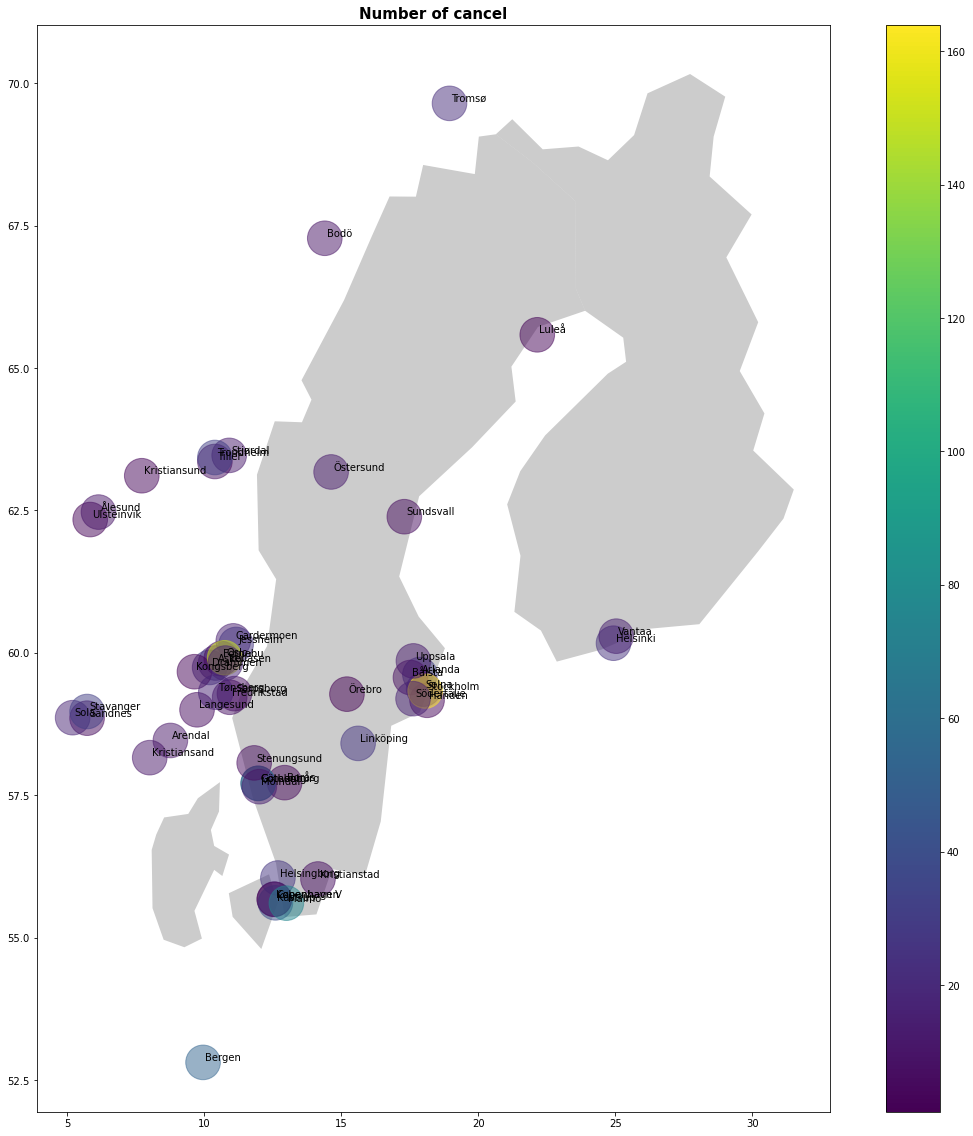

In [47]:
fig, ax = plt.subplots(figsize=(20,20))
# add .shp mapfile to axes
world2.plot(ax=ax, alpha=0.4,color='grey')
world3.plot(ax=ax, alpha=0.4,color='grey')
world1.plot(ax=ax, alpha=0.4,color='grey')


# add geodataframe to axes
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='order_id',ax=ax,alpha=0.5, legend=True,markersize=1200, antialiased=True)
# add title to graph
plt.title('Number of cancel', fontsize=15,fontweight='bold')
# set city name
for x, y, label in zip(geo_df['geometry'].x, geo_df['geometry'].y, geo_df['field_address_locality']):ax.annotate(label, xy=(x,y), xytext=(2,2), textcoords='offset points')
# show map
plt.show()

In [190]:
#filter out reason for cancelling
#1 is priced_booking
#2 is enquiry
#3 is instant_booking

cancelled_supplier_1= df[(df['status'] == 'canceled') & (df['cancelation_type']=='supplier') & (df['order_type']=='priced_booking')]
cancelled_customer_1 = df[(df['status'] == 'canceled') & (df['cancelation_type']=='customer') & (df['order_type']=='priced_booking')]
cancelled_supplier_2 = df[(df['status'] == 'canceled') & (df['cancelation_type']=='supplier') & (df['order_type']=='enquiry')]
cancelled_customer_2 = df[(df['status'] == 'canceled') & (df['cancelation_type']=='customer') & (df['order_type']=='enquiry')]
cancelled_supplier_3 = df[(df['status'] == 'canceled') & (df['cancelation_type']=='supplier') & (df['order_type']=='instant_booking')]
cancelled_customer_3 =  df[(df['status'] == 'canceled') & (df['cancelation_type']=='customer') & (df['order_type']=='instant_booking')]


# Priced Booking

In [191]:
#function to get number of cancels by month and their total, average
def cancelling_insight(df):
    a = df['order_id'].groupby(df['month_cancel']).count()
    b = df['event_price_euro'].groupby(df['month_cancel']).sum()
    df1=pd.DataFrame(a)
    df2=pd.DataFrame(b)
    df1['total_price'] = df2
    df1 = df1.reset_index()
    df1 = df1.set_index('month_cancel')
    df1 = df1.reset_index()
    df1.rename(columns={'order_id':'cancelled_requests'}, inplace=True)
    return df1

In [197]:
def plot_cancelling(df, title):
    df.plot(x='month_cancel', y='cancelled_requests', kind='bar', figsize=(10,7), color='blue', title=title, fontsize=15)
    df['total_price'].plot(x='month_cancel', linestyle='--', marker='o', secondary_y=True, color='orange', legend='total_price')

**Cancelled by supplier**

    month_cancel  cancelled_requests  total_price
0              0                   9     10134.54
1              1                   5     10859.73
2              2                   3      4848.26
3              4                   1      5790.78
4              5                   2      1766.18
5              6                   4      1379.19
6              7                   1      1434.67
7              8                   5     10883.92
8              9                  14     30435.19
9             10                  27     56234.68
10            11                  19     32780.57
11            12                   9     10195.09
***********************************************************************
Reason for cancelling
No availability.                                            75
The event was requested to be cancelled by the customer.    13
No reply from customer for confirmation.                     6
The arrangements requested are not possible.                 5
Name

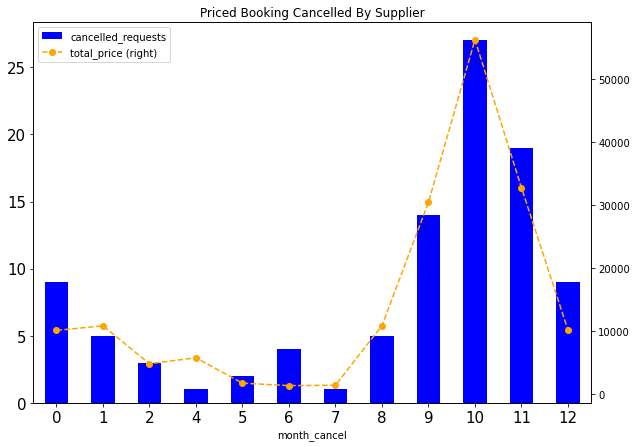

In [198]:
cancelled_supplier_p=cancelling_insight(cancelled_supplier_1)
plot_cancelling(cancelled_supplier_p, title='Priced Booking Cancelled By Supplier')
print(cancelled_supplier_p)
print('***********************************************************************')
print('Reason for cancelling')
print(cancelled_supplier_1['description'].value_counts())

**Cancelled by customer**

   month_cancel  cancelled_requests  total_price
0             0                   5      4922.24
1             1                   3      9576.21
2             4                   2     13452.68
3             5                   1      1278.29
4             6                   4      7182.98
5             8                   3      1729.40
6             9                   6     19254.93
7            10                   7      7022.65
8            11                   9     20277.21
9            12                   5      4999.49
***********************************************************************
Reason for cancelling
We chose another venue (not Nordic Choice Hotels).    17
Our event has been cancelled internally.              14
The venue offer is exceeding our budget.               5
The reply from the venue was slow.                     5
We chose another Nordic Choice Hotel.                  4
Name: description, dtype: int64


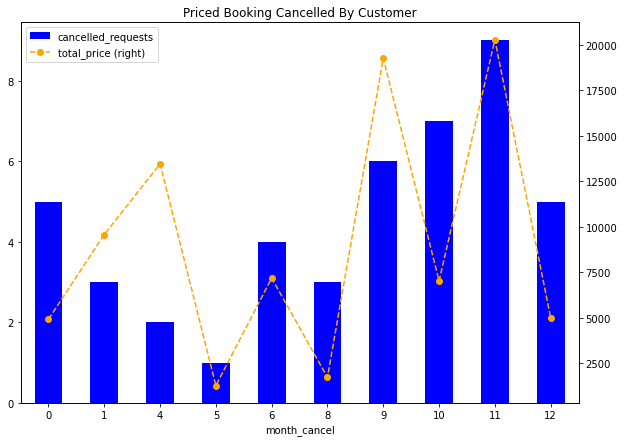

In [196]:
cancelled_cus_p=cancelling_insight(cancelled_customer_1)
plot_cancelling(cancelled_cus_p, title='Priced Booking Cancelled By Customer')
print(cancelled_cus_p)
print('***********************************************************************')
print('Reason for cancelling')
print(cancelled_customer_1['description'].value_counts())

# Enquiry

**Cancelled by supplier**

   month_cancel  cancelled_requests  total_price
0             0                  12     10021.04
1             1                   6     12491.60
2             2                   1       269.97
3             4                   2      9375.13
4             6                   3      5546.95
5             8                  10     23745.52
6             9                  25     28253.35
7            10                   8      7686.08
8            11                  11     12868.05
9            12                   2         0.00
***********************************************************************
Reason for cancelling
No availability.                                            63
No reply from customer for confirmation.                    10
The arrangements requested are not possible.                 4
The event was requested to be cancelled by the customer.     3
Name: description, dtype: int64


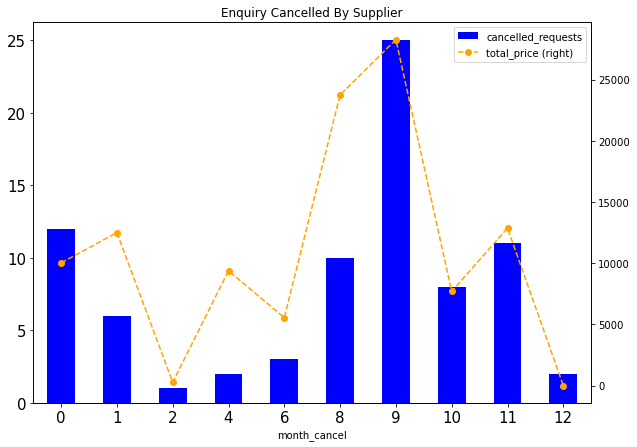

In [199]:
cancelled_supplier_e=cancelling_insight(cancelled_supplier_2)
plot_cancelling(cancelled_supplier_e, title='Enquiry Cancelled By Supplier')
print(cancelled_supplier_e)
print('***********************************************************************')
print('Reason for cancelling')
print(cancelled_supplier_2['description'].value_counts())

 **Cancelled by customer**

   month_cancel  cancelled_requests  total_price
0             0                   1      3988.25
1             1                   1       726.07
2             2                   2      5607.07
3             8                   3      7278.90
4             9                   4      5003.29
5            10                   4      5608.42
6            11                   4     16684.23
7            12                   2      5319.04
***********************************************************************
Reason for cancelling
Our event has been cancelled internally.              8
The venue offer is exceeding our budget.              6
We chose another venue (not Nordic Choice Hotels).    6
We chose another Nordic Choice Hotel.                 1
Name: description, dtype: int64


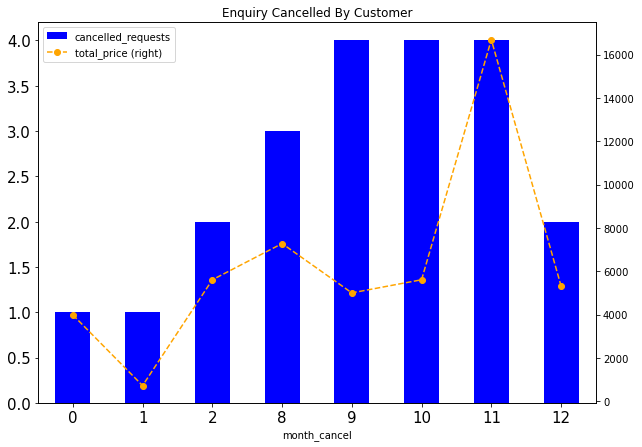

In [200]:
cancelled_cus_e=cancelling_insight(cancelled_customer_2)
plot_cancelling(cancelled_cus_e, title='Enquiry Cancelled By Customer')
print(cancelled_cus_e)
print('***********************************************************************')
print('Reason for cancelling')
print(cancelled_customer_2['description'].value_counts())

# Instant Booking

**Cancelled by supplier**

   month_cancel  cancelled_requests  total_price
0             0                   2       187.14
1             1                   4      4379.84
2             2                   1       506.20
3             3                   2      1138.70
4             6                   1       384.51
5             9                   6      5452.85
6            10                  12      7438.78
7            11                  10      5484.87
8            12                   3      2980.60
***********************************************************************
Reason for cancelling
No availability.                                            27
The event was requested to be cancelled by the customer.     7
The arrangements requested are not possible.                 4
No reply from customer for confirmation.                     3
Name: description, dtype: int64


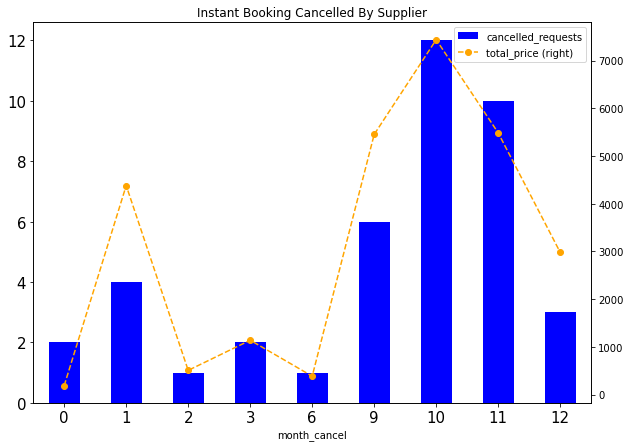

In [201]:
cancelled_supplier_ib=cancelling_insight(cancelled_supplier_3)
plot_cancelling(cancelled_supplier_ib, title='Instant Booking Cancelled By Supplier')
print(cancelled_supplier_ib)
print('***********************************************************************')
print('Reason for cancelling')
print(cancelled_supplier_3['description'].value_counts())

**Cancelled by customer**

    month_cancel  cancelled_requests  total_price
0              0                   3      1727.73
1              1                   5      2225.78
2              3                   1      1368.61
3              4                   1       139.56
4              5                   2       687.99
5              6                   1       518.98
6              8                   1      1945.29
7              9                   2      1364.72
8             10                  31     10294.46
9             11                  22      7203.11
10            12                   3      1721.19
***********************************************************************
Reason for cancelling
Our event has been cancelled internally.              55
We chose another Nordic Choice Hotel.                  8
We chose another venue (not Nordic Choice Hotels).     5
The venue offer is exceeding our budget.               2
The reply from the venue was slow.                     1
The terms of payment 

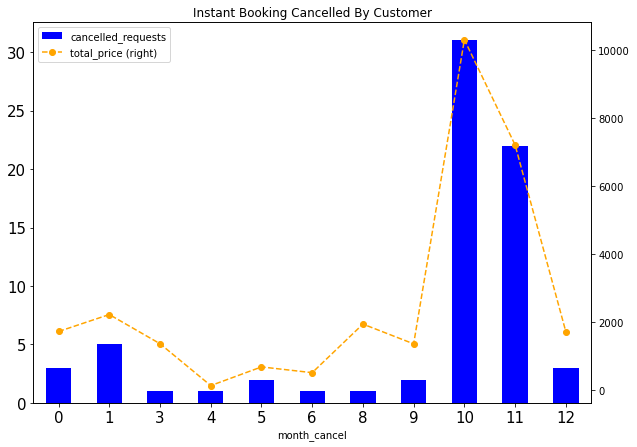

In [202]:
cancelled_cus_ib=cancelling_insight(cancelled_customer_3)
plot_cancelling(cancelled_cus_ib, title='Instant Booking Cancelled By Customer')
print(cancelled_cus_ib)
print('***********************************************************************')
print('Reason for cancelling')
print(cancelled_customer_3['description'].value_counts())

Since the data is from the beginning of October 2020 to January 2022, so the only September we have is in 2021. 

**Other Reasons**

In [57]:
payment_cancel = cancelled[cancelled['description']=='No payment received']
payment_cancel['title'].value_counts()

Clarion Hotel® Aviapolis             2
Clarion Hotel® Copenhagen Airport    2
Clarion Hotel® Stockholm             1
At Six                               1
Quality Hotel™ River Station         1
Name: title, dtype: int64

In [61]:
#cancelled_group = df.groupby(['title','month_cancel']).size().reindex(fill_value=0.0).unstack()

# Supplier Answer Time

**Cancelled Booking Supplier Answer Time**

In [221]:
def hist_plot(df, title):
    weights=np.ones_like(df['supplier_answer_time'])/float(len(df['supplier_answer_time']))
    fig, ax = plt.subplots(figsize=(10,6)) 
    plt.hist(df['supplier_answer_time'], weights=weights, color='blue')
    plt.title(title, fontsize=15)

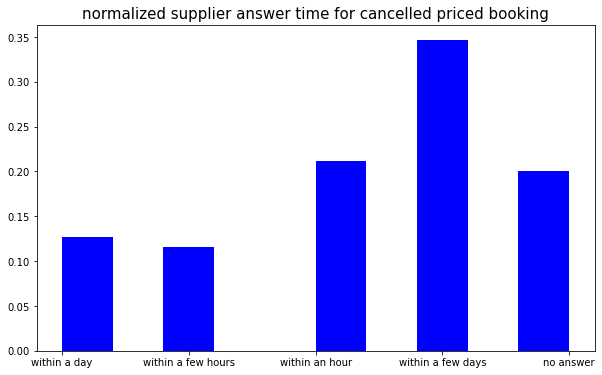

In [211]:
hist_plot(priced_cancel, title='normalized supplier answer time for cancelled priced booking')

**Cancelled Enquiry Supplier Answer Time**

In [219]:
enquiry_cancel=cancelled[cancelled['order_type']=='enquiry']

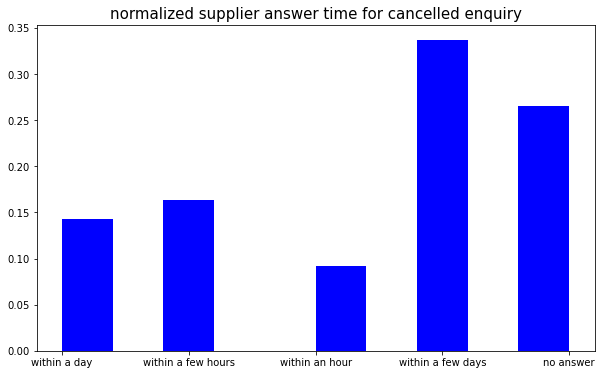

In [222]:
hist_plot(enquiry_cancel, title='normalized supplier answer time for cancelled enquiry')

In [175]:
priced_confirm = df[(df['status'] == 'booking_status_3') & (df['order_type']=='priced_booking')]
enquiry_confirm = df[(df['status'] == 'booking_status_3') & (df['order_type']=='enquiry')]
instant_confirm = df[(df['status'] == 'booking_status_3') & (df['order_type']=='instant_booking')]

priced_confirm_month = priced_confirm.groupby(['month_created', 'supplier_answer_time']).size().reindex(fill_value=0.0).unstack()

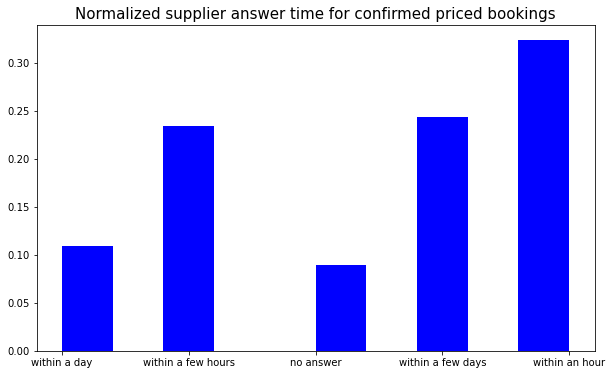

In [223]:
hist_plot(priced_confirm, title='Normalized supplier answer time for confirmed priced bookings')


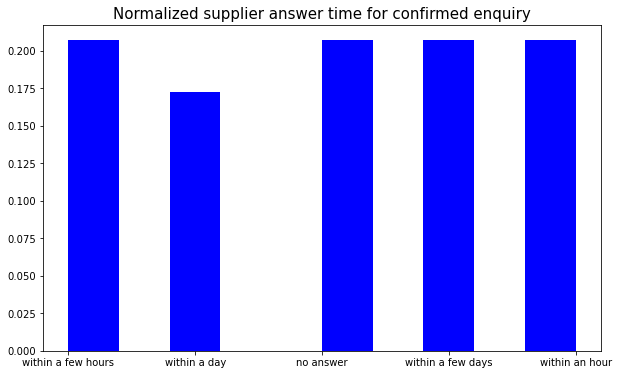

In [224]:
hist_plot(enquiry_confirm, title='Normalized supplier answer time for confirmed enquiry')

<AxesSubplot:title={'center':'Months vs supplier answer time'}, xlabel='month_cancel', ylabel='number of cancelled requests'>

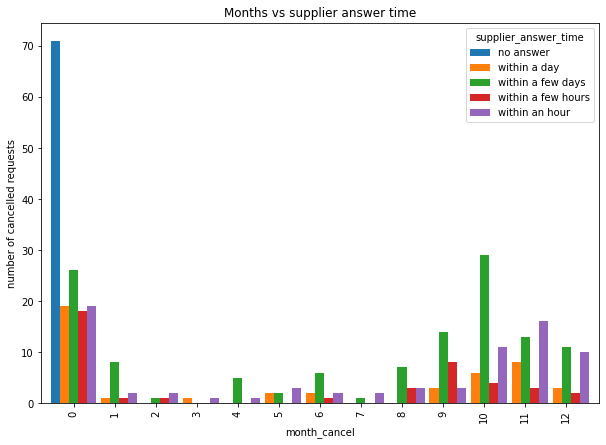

In [225]:
priced_cancel_month=priced_cancel.groupby(['month_cancel', 'supplier_answer_time']).size().reindex(fill_value=0.0).unstack()
priced_cancel_month.plot(kind='bar', figsize=(10,7), width=1.1, title='Months vs supplier answer time', ylabel='number of cancelled requests')

In the plot above I try to see the supplier repsonse time in different months. It is seen the five response times vary with month. For instance in the last quarter number of supplier answertime with ‘an hour’ response time is higher and in the summertime the most typical answer time is within a few days.

# Conclusion

- Given the main cancelling reason for popular booked venues are no availability, we should find a way to distribute/redirect the overload traffic from those venues to nearby NCH venues 


- Consider increasing meeting room price for venues that have low cancellation rate

- The availability of supplier data is not sufficient to conduct the drop off in user engagement hence in order to understand    why some venues perform best and some venues perform worse, we first need to understand the behavior of meeting bookers 
more data needed of 
uder id
previous_cancellations: cancellation in past                 
previous_bookings_not_canceled: not cancelled in past  
is new or old guest
purpose of booking
country of booker
device
date_account_created
date_first_booking
gender



December sees the highest booking requests(did they run any campaign in December) if yes, the effect of this campaign is good.
From marketing point of view,  more money to advertise on venues that have low traffic


O the marketing side, how did we get the bookers to book the meeting, where did they come from, what is the purpose of their meeting? how do we measure the satisfaction of the booker. 




To start diagnosing the cause of these behaviors, I would begin by asking the following questions to understand the context in which the decline in engagement was detected.
 Is the decline in engagement a one-time event or has it happened progressively?
 If it is a one-time thing, then it is possible a technology glitch caused the problem, such as a downtime in the services that. Therefore, I would ask if there were technical problems that coincided. If the decline in engagement is progressive, then the cause is still there, and we can dig deeper into data, which I found there wasn't any constantly downtime in the services
 Is the decline happening in an isolated region? Yes

  
Clarion Hotel® Arlanda Airport -> Arlanda
Quality Hotel™ Arlanda XPO -> Arlandastad

UX: the button leading to bookameeting.se in English page is in Swedish, what if the booker is a foreigner trying to book a meeting --> he can't figure out the purpose of that button 
Arlanda can't be found in nordicchoicehotel.com only Arlandstad
on the search of bookameeting.se, there 2 results for Arlanda (Arlanda and Arlandstad) with wrong number of venues (shows 1 but actually 2)

Same for copenhagen
kopenhaven or copenhagen can't be found on bookameeting.se coming from nordicchoicehotel.dk, but copenhagen can be found on bookameeting.se coming from nordicchoicehotel.com

Nordic Choice and Hotel C Stockholm shows no availabilty on search page of bookameeting.se even though there are rooms available if user comes from nordicchoicehotel.com and search for Stockholm

Also
Örebro location cannot be found on bookameeting.se, 

Additionally, some  venues require visitors to log in to check availability, which may prevent lazy bookers from doing so. 

STK Petri doesn't have any instant booking and priced booking

For other hotel, it's just because they are in remote areas and instant booking time inconsistency. 

In summary, my approach to finding the cause of lower booking requests is as follows: I started by understanding the context so that I could discard issues related to regions, specific platforms, and marketing problems. Then, I dug deeper to identify what could affect user behavior to stop them from engaging. Of those possible causes, I think the most plausible ones are: the name convention, location search bugs, instant booking time inconsistency. 

ways to improve search, booker can choose booking types (instant booking or priced bookings on the search)